In [2]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from utils import *

In [3]:
plt.rc('font', family='NanumGothic')

In [4]:
df = pd.read_pickle('./20221111_df.pkl')

In [5]:
evt = get_event_date()

In [6]:
df

,title,user,time,view,recommendation,job,category,pred,score
0,윈브 하이퍼 패시브 뭐찍어야댐? 골때리네요 이거,신사동현빈,06-18,1925,0,윈드브레이커,궁수,부정,0.831121
1,(심각) 윈브 리마 오류 및 개선 사항,Reformed,06-18,2500,24,윈드브레이커,궁수,부정,0.992333
2,근데 진짜 하이퍼스킬 강화는 프리셋 언제 만들어 줌?,모르겟어요,06-18,387,0,윈드브레이커,궁수,부정,0.642192
3,테섭에서 지진의룬 까보신분?,먕먕누구야,06-18,608,0,윈드브레이커,궁수,부정,0.826824
4,핀포인트 디버프랑 플라워 방무 15%는 대체 왜 패시브 안해줌??,밤샘2,06-18,923,5,윈드브레이커,궁수,부정,0.716155
...,...,...,...,...,...,...,...,...,...
38458,2.3 섀린이 보스꿀팁부탁드립니다.,또버워치,11-11,382,0,섀도어,도적,부정,0.762684
38459,무릉 풀 시드링이면 +2층 정도 되나요?,경품big,11-11,399,0,섀도어,도적,부정,0.689994
38460,데벤져 질문,엄빌리버블,11-11,60,0,데몬어벤져,전사,부정,0.620235
38461,데벤져 트왈마토드 질문있습니다ㅠㅜ,Xnzm4,11-11,349,0,데몬어벤져,전사,긍정,0.862104


In [7]:
word_cnts = word_cnt_by(df, by=None)

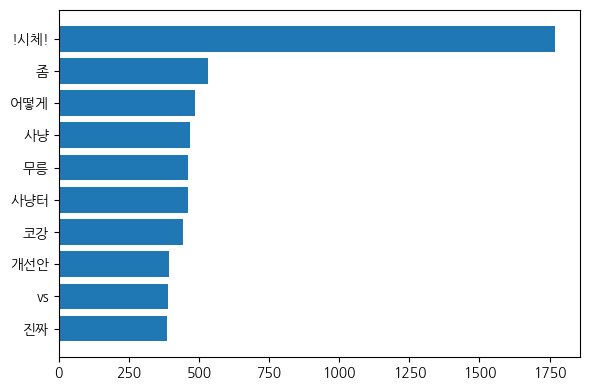

In [8]:
plt.figure(dpi=100)
top_10 = sorted(word_cnts.items(), key=lambda x: x[1], reverse=True)[:10]
plt.barh(*zip(*top_10[::-1]))
plt.tight_layout()
plt.savefig('keyword_all.svg')
plt.show()

# 직업에 따른 최대 언급 단어

In [9]:
word_per_category = word_cnt_by(df, by='category')

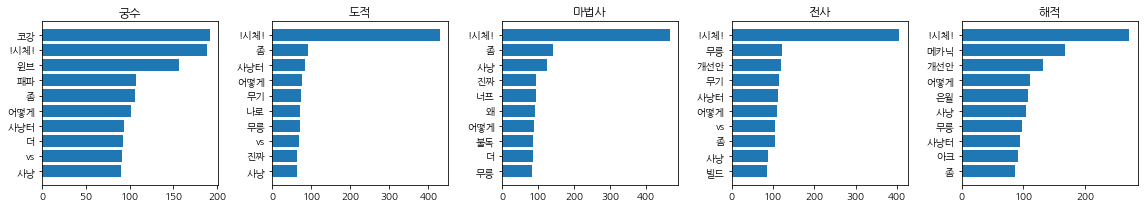

In [12]:
ncols = 5
nrows = 1
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(16, 3))
for idx, category in enumerate(word_per_category):
    cur_ax = axs[idx % ncols]
    top_10 = sorted(word_per_category[category].items(), key=lambda x: x[1], reverse=True)[:10]
    cur_ax.set_title(category)
    cur_ax.barh(*zip(*top_10[::-1]))
plt.tight_layout()
plt.savefig("keyword_cat.svg")
plt.show()

In [11]:
word_per_job = word_cnt_by(df, by='job')

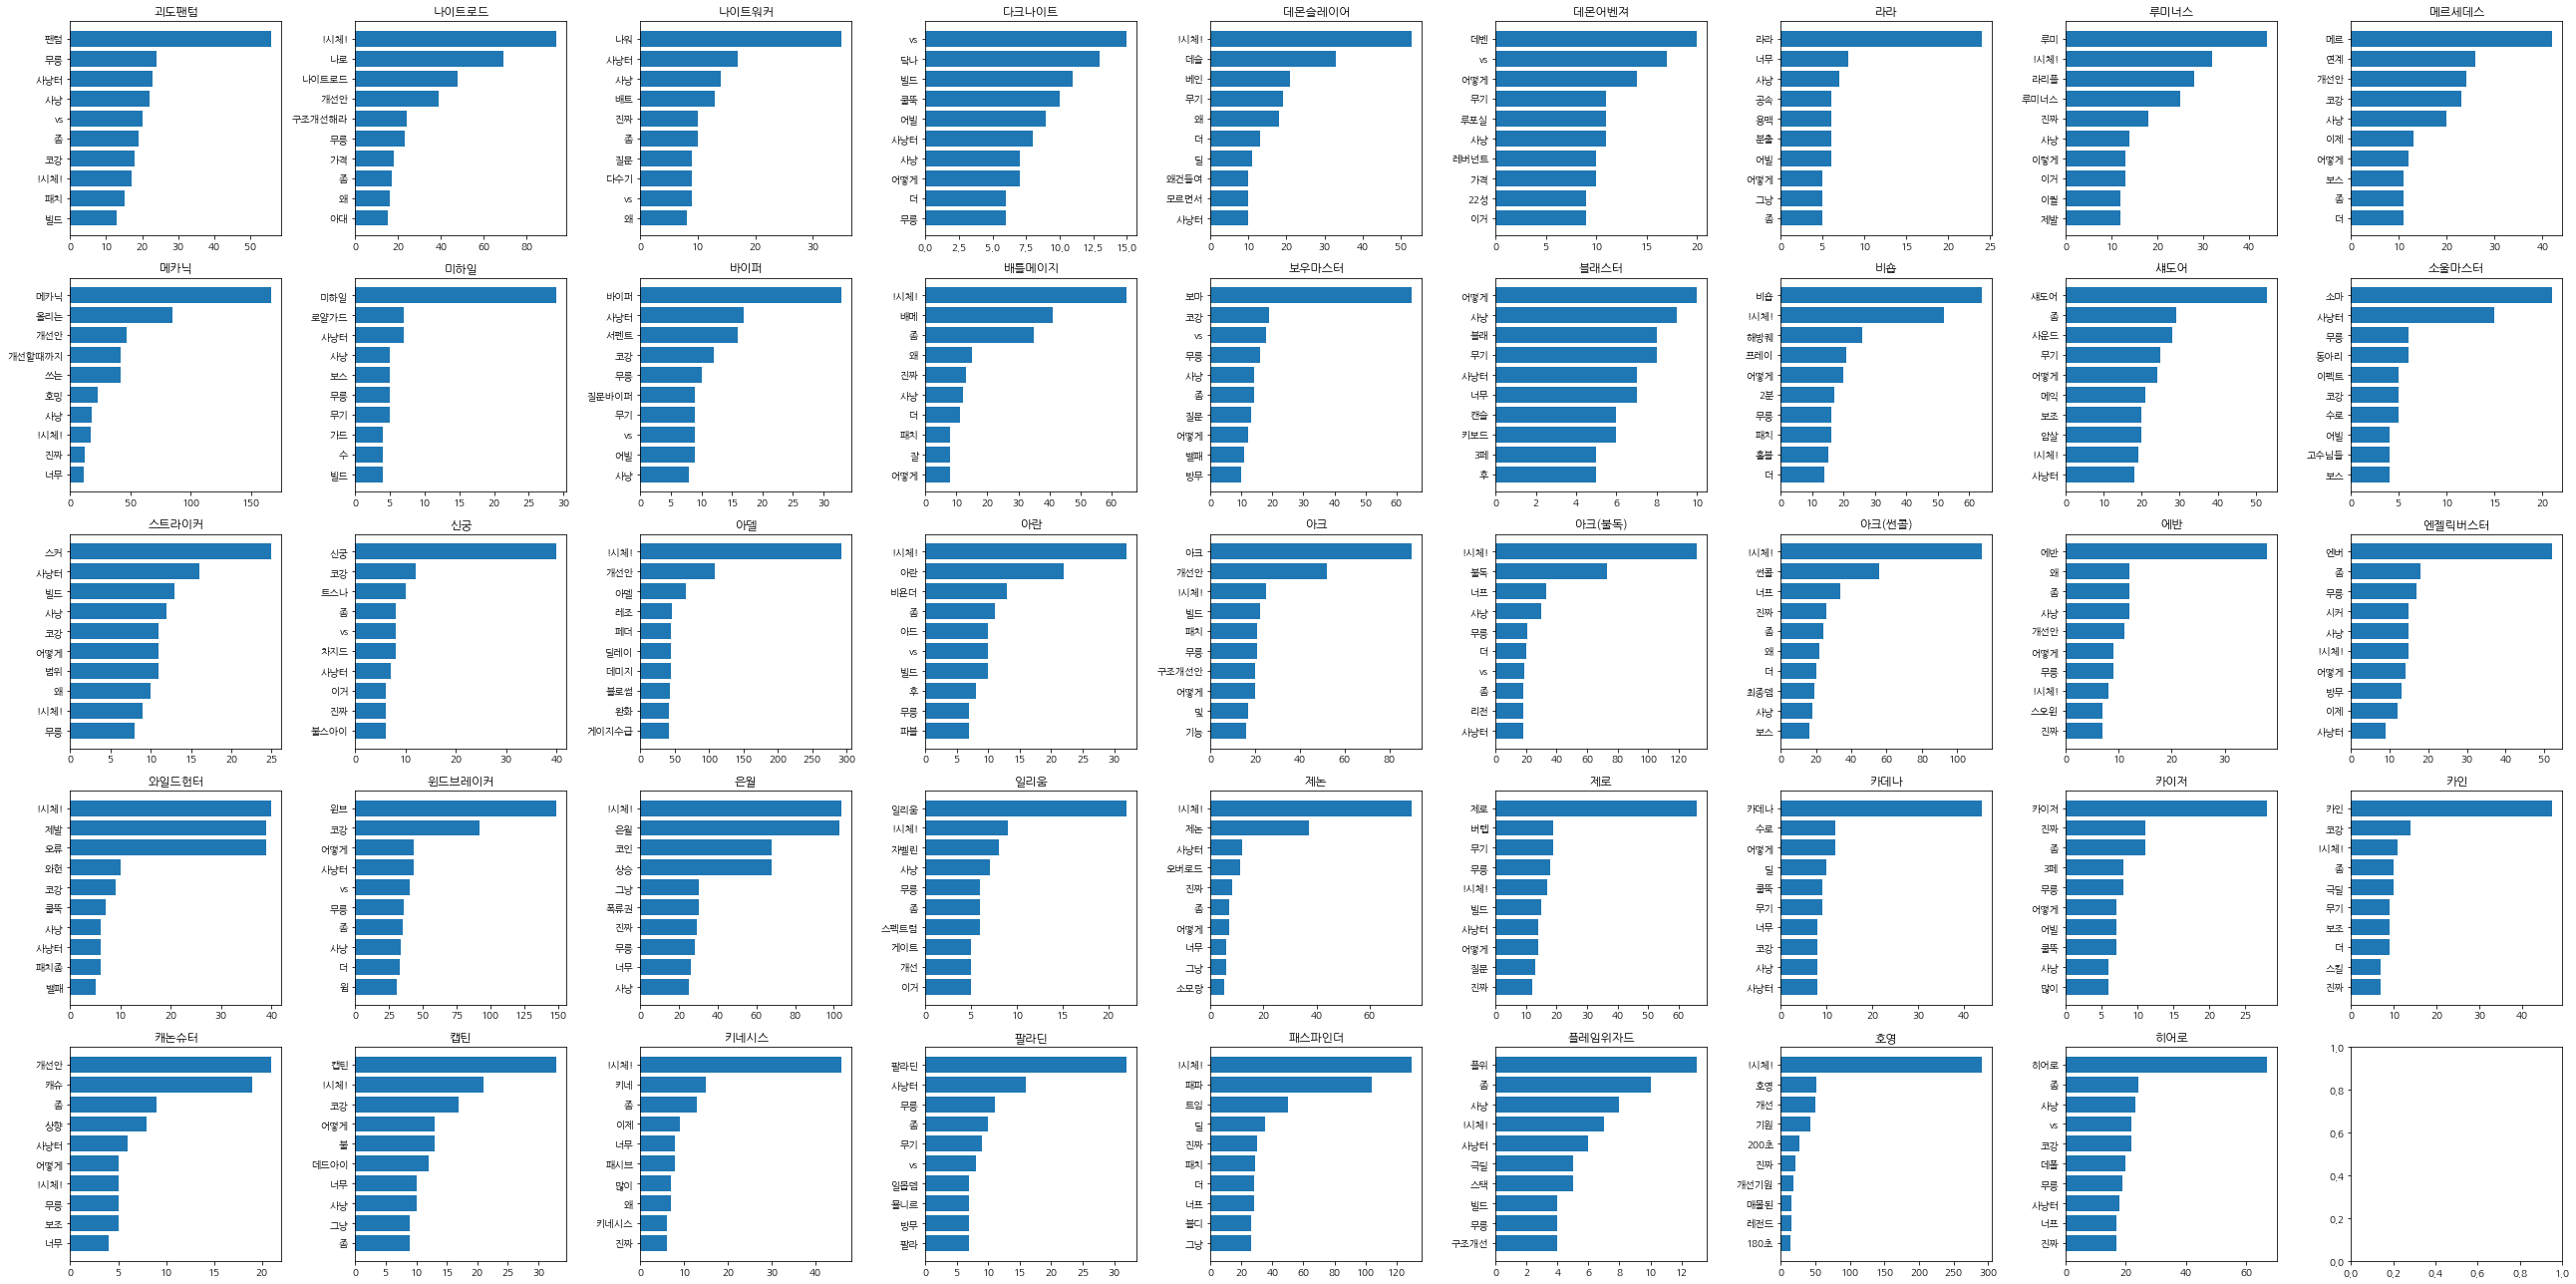

In [12]:
ncols = 9
nrows = 5
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(36, 18))
for idx, job in enumerate(word_per_job):
    cur_ax = axs[idx // ncols][idx % ncols]
    top_10 = sorted(word_per_job[job].items(), key=lambda x: x[1], reverse=True)[:10]
    cur_ax.set_title(job)
    cur_ax.barh(*zip(*top_10[::-1]))
plt.tight_layout()
plt.savefig("keyword_job.svg")
plt.show()

# 날자별 최대 언급 단어

In [13]:
word_per_date = df.groupby('time')['title'].sum().apply(lambda x: sorted(word_counter(x).items(), key=lambda x: x[1], reverse=True)[0]).reset_index()

In [14]:
word_per_date['count'] = word_per_date['title'].apply(lambda x: x[1])
word_per_date['title'] = word_per_date['title'].apply(lambda x: x[0])

In [15]:
word_per_date = word_per_date.sort_values(by='time', ascending=True)

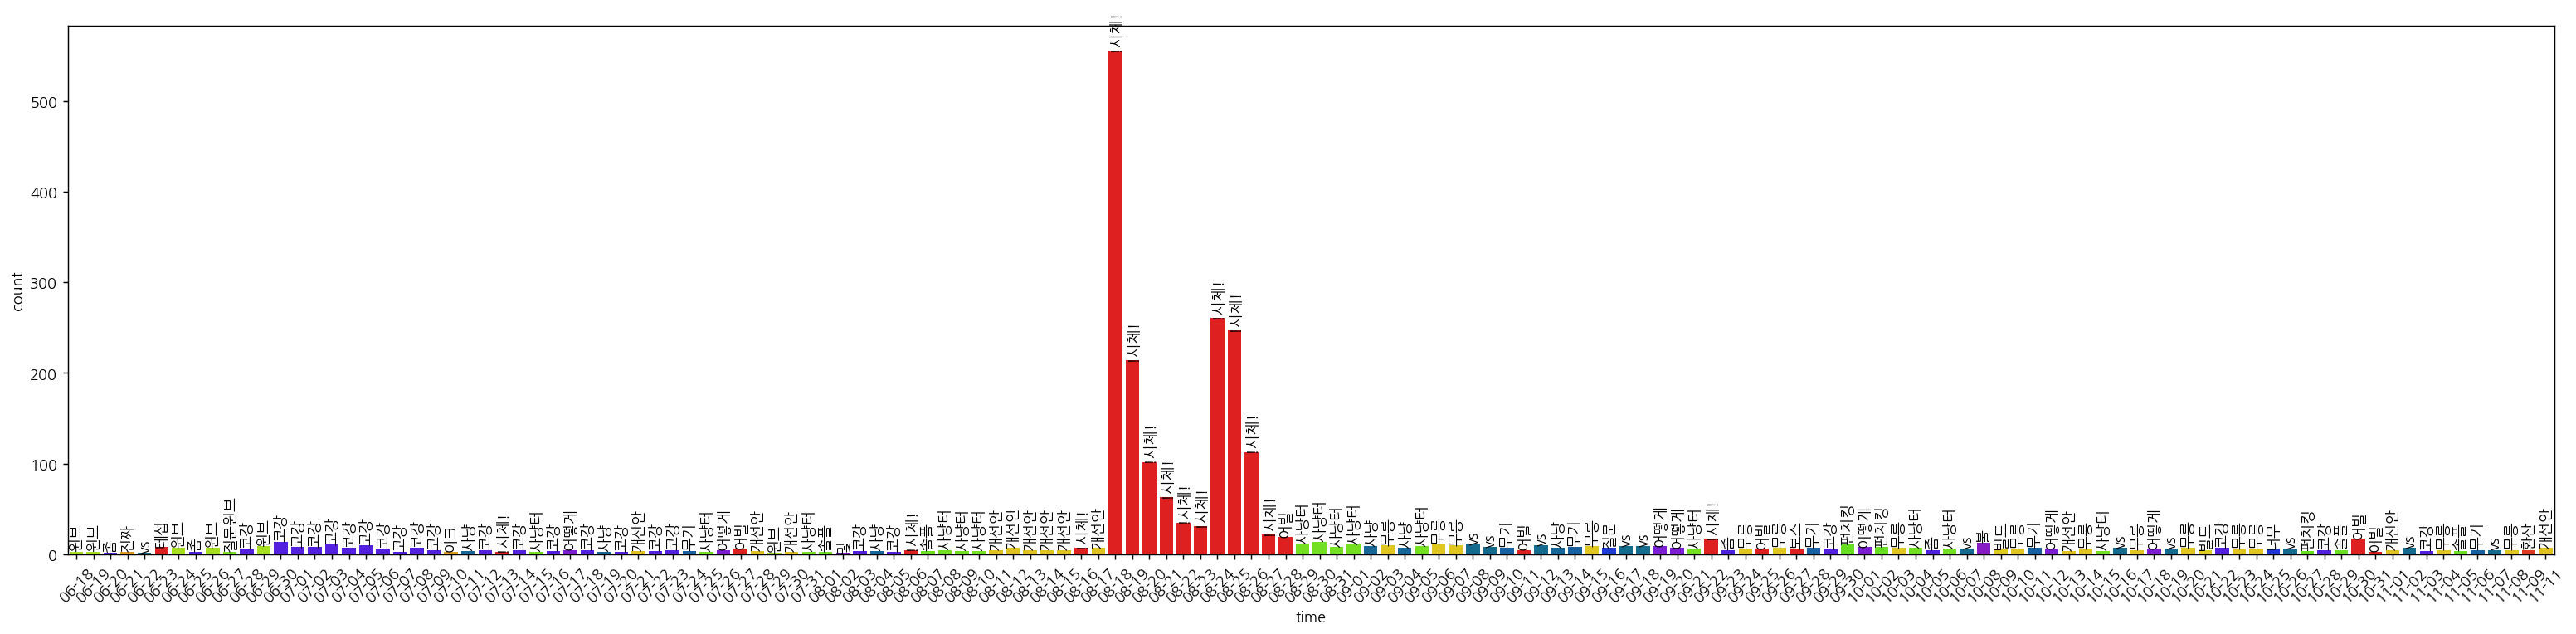

In [16]:
plt.figure(figsize=(24, 6), dpi=130)
temp = {i:idx for idx, i in enumerate(word_per_date['title'].unique())}
palette = sns.color_palette("prism", len(temp.keys()))
g = sns.barplot(data=word_per_date, x='time', y='count', orient='v', palette=word_per_date['title'].apply(lambda x: palette[temp[x]]))
g.bar_label(g.containers[0], labels=word_per_date['title'], rotation=90)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("keyword_date.svg")
plt.show()